In [ ]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import integrate

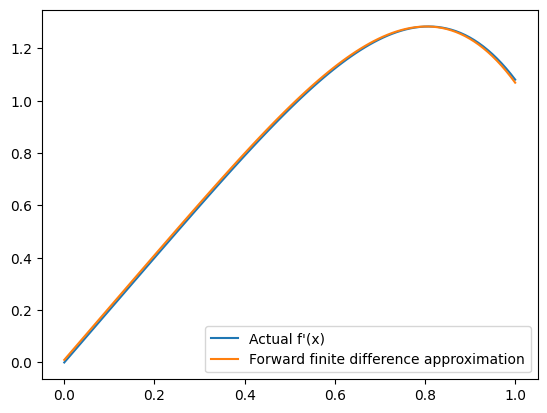

In [ ]:
def df(x):
  return math.cos(x**2)*2*x
def f(x):
  return math.sin(x**2)
xpoints = np.linspace(0, 1, 100)
actualypoints = [df(i) for i in xpoints]
approxypoints=[(f(i+0.01)-f(i))/0.01 for i in xpoints]
plt.plot(xpoints, actualypoints, label="Actual f'(x)")
plt.plot(xpoints,approxypoints,label="Forward finite difference approximation")
plt.legend()
plt.show()

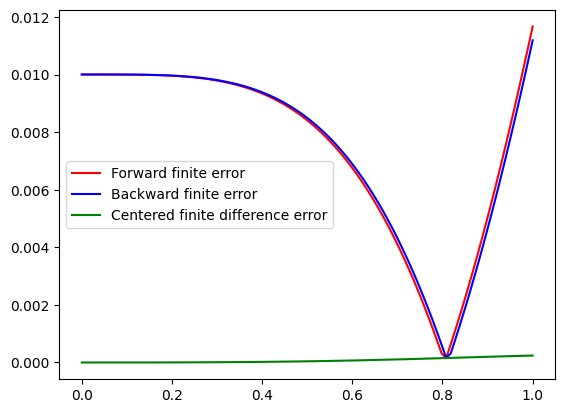

In [ ]:
def df(x):
  return math.cos(x**2)*2*x
def f(x):
  return math.sin(x**2)
xpoints = np.linspace(0, 1, 100)
actualypoints = [df(i) for i in xpoints]

fypoints=[(f(i+0.01)-f(i))/0.01 for i in xpoints]
ferror=[abs(i-j) for i,j in zip(actualypoints,fypoints)]
plt.plot(xpoints,ferror,label="Forward finite error",color='r')

bypoints=[(f(i)-f(i-0.01))/0.01 for i in xpoints]
berror=[abs(i-j) for i,j in zip(actualypoints,bypoints)]
plt.plot(xpoints,berror,label="Backward finite error",color='b')

cfdpoints=[(f(i+0.01)-f(i-0.01))/0.02 for i in xpoints]
cfderror=[abs(i-j) for i,j in zip(actualypoints,cfdpoints)]
plt.plot(xpoints,cfderror,label="Centered finite difference error",color='g')
plt.legend()
plt.show()

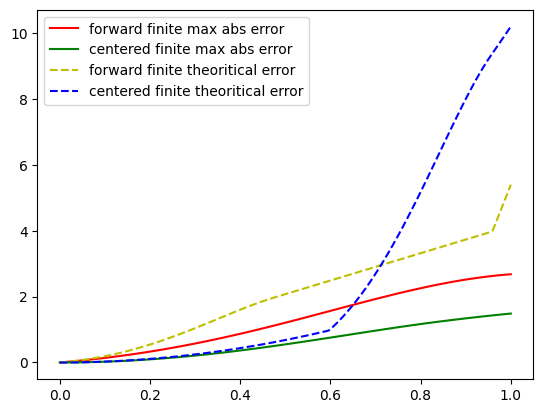

In [ ]:
def maxerrorforh(h):
  def dddf(x):
    return -12*x *math.sin(x**2) - 8 *(x**3)* math.cos(x**2)
  def ddf(x):
    return 2*math.cos(x**2) -  4*(x**2)*math.sin(x**2)
  def df(x):
    return np.cos(x**2)*2*x
  def f(x):
    return np.sin(x**2)

  xpoints = np.linspace(0, 1, 100)
  fdashx = [df(i) for i in xpoints]

  fypoints=[(f(i+h)-f(i))/h for i in xpoints]
  ferror=[abs(i-j) for i,j in zip(fdashx,fypoints)]

  bypoints=[(f(i)-f(i-h))/h for i in xpoints]
  berror=[abs(i-j) for i,j in zip(fdashx,bypoints)]

  cfdpoints=[(f(i+h)-f(i-h))/(2*h) for i in xpoints]
  fberror=[abs(i-j) for i,j in zip(fdashx,cfdpoints)]

  return [max(ferror),max(berror),max(fberror)]

def theoerrorforh(h):
  def dddf(x):
    return -12*x *math.sin(x**2) - 8 *(x**3)* math.cos(x**2)
  def ddf(x):
    return 2*math.cos(x**2) -  4*(x**2)*math.sin(x**2)
  def df(x):
    return np.cos(x**2)*2*x
  def f(x):
    return np.sin(x**2)

  xpoints = np.linspace(0, 1, 100)
  ferror=[]
  berror=[]
  fberror=[]
  for i in xpoints:
    xto_xplush=np.linspace(i, i+h, 100)
    fddashx = [abs(ddf(i)) for i in xto_xplush]
    fdddashx= [abs(dddf(i)) for i in xto_xplush]
    ferror.append(h*max(fddashx)/2)
    berror.append(-h*max(fddashx)/2)
    fberror.append(h*h*max(fdddashx)/6)
  return [max(ferror),min(berror),max(fberror)]


hpoints=np.linspace(0.0001,1,100)
maxerrorpoints=[maxerrorforh(i) for i in hpoints]
theoerrorpoints=[theoerrorforh(i) for i in hpoints]
plt.plot(hpoints,[item[0] for item in maxerrorpoints],label="forward finite max abs error",color='r')
#plt.plot(hpoints,[item[1] for item in maxerrorpoints],label="backward finite max abs error",color='b')
plt.plot(hpoints,[item[2] for item in maxerrorpoints],label="centered finite max abs error",color='g')
plt.plot(hpoints,[item[0] for item in theoerrorpoints],label="forward finite theoritical error",color='y',linestyle="--")
#plt.plot(hpoints,[item[1] for item in theoerrorpoints],label="backward finite theoritical error",color='b',linestyle="--")
plt.plot(hpoints,[item[2] for item in theoerrorpoints],label="centered finite theoritical error",color='b',linestyle="--")
plt.legend()
plt.show()

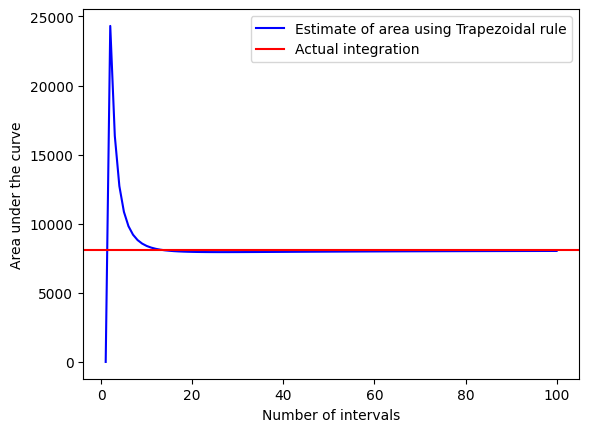

In [ ]:
def integration_f(x1,x2):
  return math.e**(x2**2)-math.e**(x1**2)

def area_under_curve(m):
  def f(x):
    return 2*x*(math.e**(x**2))
  intervals=np.linspace(1,3,m)
  area=(3-1)*sum([f(intervals[k])+f(intervals[k-1]) for k in range(1,len(intervals))])/(2*m)
  return area

a=1
b=3
m=100
xpoints=range(1,m+1)
ypoints=[]
for i in xpoints:
  ypoints.append(area_under_curve(i))
plt.plot(xpoints,ypoints,label="Estimate of area using Trapezoidal rule",color="b")
plt.axhline(integration_f(a,b),label="Actual integration",color="r")
plt.xlabel("Number of intervals")
plt.ylabel("Area under the curve")
plt.legend()
plt.show()

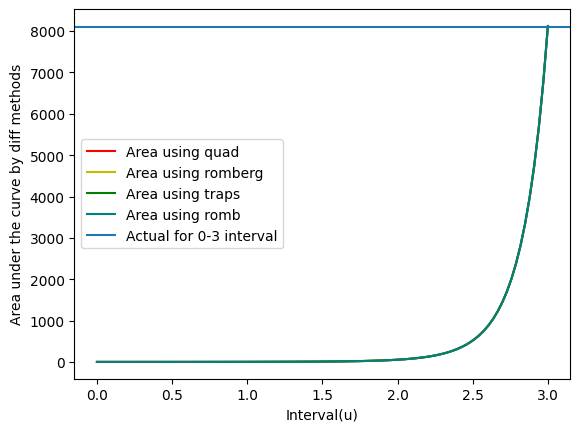

In [ ]:
def integration_f(x1,x2):
  return math.e**(x2**2)-math.e**(x1**2)

def area_under_curve_inbuilt(u):
  def f(x):
    return 2*x*(math.e**(x**2))
  areas=[]
  areas.append(integrate.quad(f,0,u)[0])
  areas.append(integrate.romberg(f,0,u))
  m=np.linspace(0,u,100)
  yvalues=[f(i) for i in m]
  areas.append(integrate.trapz(yvalues,m))
  areas.append(integrate.simps(yvalues,m))
  return areas

actualarea=[]
#with f
quadlist=[]
romberglist=[]
#without f
trapslist=[]
simpslist=[]
ulist=np.linspace(0,3,100)
for u in ulist:
  #actualarea.append(integration_f(0,u))
  areas=area_under_curve_inbuilt(u)
  quadlist.append(areas[0])
  romberglist.append(areas[1])
  trapslist.append(areas[2])
  simpslist.append(areas[3])
#plt.plot(ulist,actualarea,label="Actual area by integration",color="b")
plt.plot(ulist,quadlist,label="Area using quad",color="r")
plt.plot(ulist,romberglist,label="Area using romberg",color="y")
plt.plot(ulist,trapslist,label="Area using traps",color="g")
plt.plot(ulist,simpslist,label="Area using romb",color="teal")
plt.axhline(integration_f(0,3),label="Actual for 0-3 interval")
plt.xlabel("Interval(u)")
plt.ylabel("Area under the curve by diff methods")
plt.legend()
plt.show()

In [ ]:
class Polynomial():
  def __init__(self,coeff):
    self.coeff=coeff

  def __str__(self):
    return ("Coefficients of the polynomial are:\n"+" ".join([str(i) for i in self.coeff]))

  def derivative(self):
    np=Polynomial([])
    for i in range(1,len(self.coeff)):
      np.coeff.append(i*self.coeff[i])
    return np

  def area(self,interval1,interval2):
    def f(x):
      ans=0
      for i in range(len(self.coeff)):
        ans+=self.coeff[i]*x**i
      return ans
    return f"Area in the interval [{interval1},{interval2}] is "+str(integrate.quad(f,interval1,interval2)[0])

p = Polynomial([1, 2, 3])
pd = p.derivative()
print(pd)
print(p.area(1,2))


Coefficients of the polynomial are:
2 6
Area in the interval [1,2] is 10.999999999999998


In [ ]:
p = Polynomial([0,1,1,1/3,0,-1/30,-1/90,-1/630,0,1/22680,1/113400])
area_by_taylor=p.area(0,0.5)
area=area_by_taylor.split(" ")
n=len(area)
intareat=float(area[n-1])

def f(x):
  return exp(x)*sin(x)
actual_area=integrate.quad(f,0,0.5)[0]

error=abs(intareat-actual_area)
if(error<=10**(-6)):
  print("Error is within 10^-6 tolerance area that is ",error)
else:
  print("Error is beyond the tolerance level",error)

Error is within 10^-6 tolerance area that is  1.6262047264348212e-11
